Importing the **numpy**, **pandas**, **seaborn** and **matplotlib** libraries, which provide tools for exploratory data analysis and visualization.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

I load the Steam sales CSV into a DataFrame, normalize and convert **Release Date** in-place to proper `datetime` (ISO `yyyy-mm-dd`), and assert that no dates failed conversion. I clean **#Reviews** by removing commas and trailing `.0`, then convert to **int**. I also clean **Rating** by stripping trailing `.0` and convert it to **int**.


In [3]:
steam_sales_path= "../data/steam_sales.csv"
steam_df = pd.read_csv(steam_sales_path)

# Convert Release Date to datetime for easier time-based analysis (sorting, plotting, extracting year/month)
def normalize_date_format(date_str):
    if pd.isna(date_str):
        return None
    
    # Pattern 1: Month day, year (e.g., "Jun 16, 2025")
    pattern1 = r'^([A-Za-z]{3}) (\d{1,2}), (\d{4})$'
    # Pattern 2: Day month, year (e.g., "25 Jun, 2024")
    pattern2 = r'^(\d{1,2}) ([A-Za-z]{3}), (\d{4})$'
    
    if re.match(pattern1, date_str):
        m = re.match(pattern1, date_str)
        # Reorder to "16 Jun, 2025"
        return f"{m.group(2)} {m.group(1)}, {m.group(3)}"
    elif re.match(pattern2, date_str):
        return date_str  # already correct
    else:
        return None  # non-date strings (like "Coming Soon")

# Apply normalization, then convert back into datetime (overwriting the same column)
steam_df['Release Date'] = steam_df['Release Date'].apply(normalize_date_format)
steam_df['Release Date'] = pd.to_datetime(steam_df['Release Date'], format="%d %b, %Y", errors='coerce')

# Ensure all dates are parsed correctly
assert steam_df['Release Date'].isna().sum() == 0, "Not all dates converted successfully."

steam_df['#Reviews'] = (
    steam_df['#Reviews']
    .str.replace(',', '', regex=False)   # remove commas
    .str.replace(r'\.0$', '', regex=True) # remove trailing ".0"
    .astype(int)                         # convert to int
)

steam_df['Rating'] = (
    steam_df['Rating']
    .astype(str)
    .str.replace(r'\.0$', '', regex=True)  # remove trailing ".0"
    .astype(int)                         # convert to float
)


In [4]:
steam_df.head()

,Game Name,Rating,#Reviews,Discount%,Price (€),Original Price (€),Release Date,Windows,Linux,MacOS,Fetched At
0,PEAK,7,77683,-38.0,4.64,7.49,2025-06-16,1,0,0,2025-08-11 00:00
1,Cyberpunk 2077,7,772574,-65.0,20.99,59.99,2020-12-09,1,0,1,2025-08-11 00:00
2,Rust,7,1038433,-50.0,19.99,39.99,2018-02-08,1,0,1,2025-08-11 00:00
3,Microsoft Flight Simulator (2020) 40th Anniver...,5,63905,-60.0,27.99,69.99,2020-08-17,1,0,0,2025-08-11 00:00
4,Sid Meier's Civilization VII,4,34643,-30.0,48.99,69.99,2025-02-10,1,1,1,2025-08-11 00:00


In [5]:
# Quick overview
print("Dataset info:")
print(steam_df.info())

print("\nFirst 5 rows:")
display(steam_df.head())

print(f"\nShape of dataset: {steam_df.shape}")
print("\nSummary statistics:")
display(steam_df.describe())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2543 entries, 0 to 2542
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Game Name           2543 non-null   object        
 1   Rating              2543 non-null   int64         
 2   #Reviews            2543 non-null   int64         
 3   Discount%           2543 non-null   float64       
 4   Price (€)           2543 non-null   float64       
 5   Original Price (€)  2543 non-null   float64       
 6   Release Date        2543 non-null   datetime64[ns]
 7   Windows             2543 non-null   int64         
 8   Linux               2543 non-null   int64         
 9   MacOS               2543 non-null   int64         
 10  Fetched At          2543 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 218.7+ KB
None

First 5 rows:


,Game Name,Rating,#Reviews,Discount%,Price (€),Original Price (€),Release Date,Windows,Linux,MacOS,Fetched At
0,PEAK,7,77683,-38.0,4.64,7.49,2025-06-16,1,0,0,2025-08-11 00:00
1,Cyberpunk 2077,7,772574,-65.0,20.99,59.99,2020-12-09,1,0,1,2025-08-11 00:00
2,Rust,7,1038433,-50.0,19.99,39.99,2018-02-08,1,0,1,2025-08-11 00:00
3,Microsoft Flight Simulator (2020) 40th Anniver...,5,63905,-60.0,27.99,69.99,2020-08-17,1,0,0,2025-08-11 00:00
4,Sid Meier's Civilization VII,4,34643,-30.0,48.99,69.99,2025-02-10,1,1,1,2025-08-11 00:00



Shape of dataset: (2543, 11)

Summary statistics:


,Rating,#Reviews,Discount%,Price (€),Original Price (€),Release Date,Windows,Linux,MacOS
count,2543.000000,2.543000e+03,2543.000000,2543.000000,2543.000000,2543,2543.000000,2543.000000,2543.000000
mean,6.433346,1.845428e+04,-51.055053,12.742993,27.949866,2021-12-07 10:56:17.742823424,0.996068,0.185608,0.281950
min,3.000000,1.000000e+01,-95.000000,0.530000,2.990000,2006-11-29 00:00:00,0.000000,0.000000,0.000000
25%,5.000000,1.013500e+03,-74.500000,5.990000,15.990000,2020-01-12 12:00:00,1.000000,0.000000,0.000000
50%,7.000000,3.344000e+03,-50.000000,9.990000,24.990000,2023-03-06 00:00:00,1.000000,0.000000,0.000000
75%,7.000000,1.391550e+04,-30.000000,16.990000,39.990000,2024-10-18 12:00:00,1.000000,0.000000,1.000000
max,8.000000,1.038433e+06,-10.000000,64.990000,99.990000,2025-09-28 00:00:00,1.000000,1.000000,1.000000
std,1.279637,5.650066e+04,23.132706,8.990933,15.762686,NaN,0.062597,0.388866,0.450038


Getting the top 5 games by platform, this is sorted by rating for each platform.

In [6]:
platforms = ['Windows', 'Linux', 'MacOS']
top_n = 5

for plat in platforms:
    print(f"Top {top_n} games for {plat}:")
    display(
        steam_df[steam_df[plat]==1]
        .sort_values('Rating', ascending=False)
        .head(top_n)
        [['Game Name','Rating','Price (€)','Discount%']]
    )

Top 5 games for Windows:


,Game Name,Rating,Price (€),Discount%
2128,Arctic Eggs,8,4.99,-50.0
284,ROUNDS,8,2.74,-50.0
1903,Human Fall Flat,8,5.99,-70.0
538,SOMA,8,8.99,-70.0
935,FlyKnight,8,4.79,-20.0


Top 5 games for Linux:


,Game Name,Rating,Price (€),Discount%
1021,Astral Ascent,8,12.49,-50.0
415,Is This Seat Taken?,8,8.99,-10.0
1080,Danganronpa: Trigger Happy Havoc,8,13.99,-30.0
1075,The Jackbox Party Pack 4,8,11.24,-55.0
1480,Dead Cells,8,10.99,-50.0


Top 5 games for MacOS:


,Game Name,Rating,Price (€),Discount%
1784,Beastieball,8,16.99,-15.0
1269,The Henry Stickmin Collection,8,5.99,-60.0
2022,NEEDY STREAMER OVERLOAD,8,7.99,-50.0
737,Baldur's Gate 3,8,44.99,-25.0
802,Slay the Spire,8,8.49,-66.0


Next we want to visualize how many games are available for each platform.

/var/folders/th/ggxxzbv16pvd12pt0k2h8rtr0000gn/T/ipykernel_24688/118175025.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='viridis')


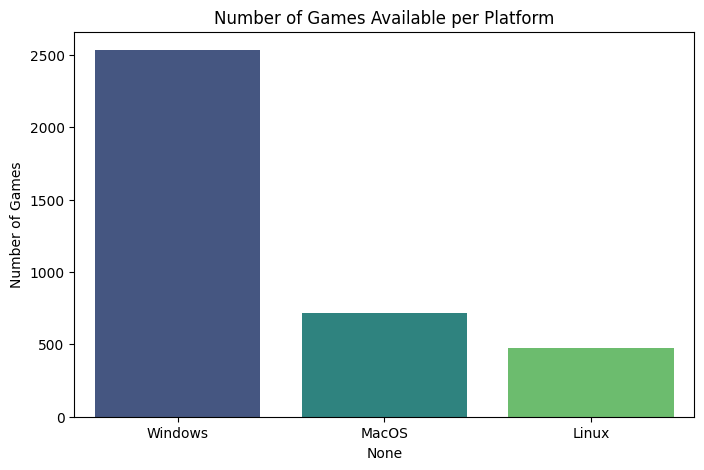

In [7]:
platform_counts = steam_df[['Windows', 'Linux', 'MacOS']].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='viridis')
plt.title('Number of Games Available per Platform')
plt.ylabel('Number of Games')
plt.show()

Next we have the **discount** distribution for all games. This is useful for knowing typical discounts and their frequency. 

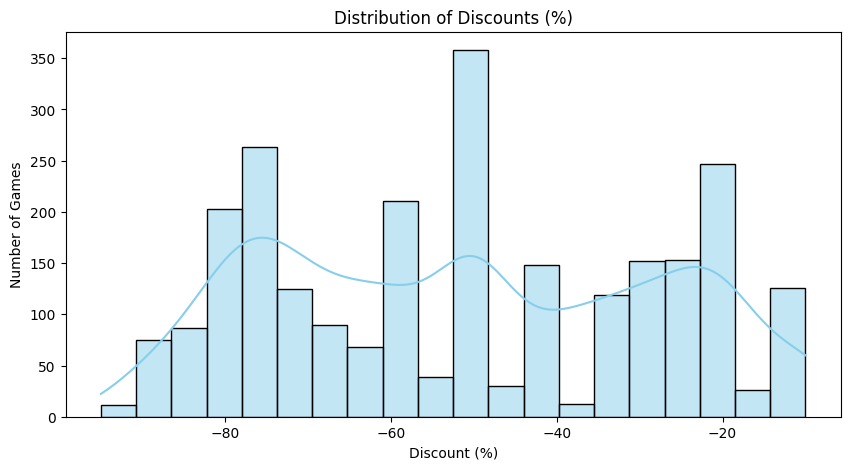

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(steam_df['Discount%'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Discounts (%)')
plt.xlabel('Discount (%)')
plt.ylabel('Number of Games')
plt.show()


Now we want to see how **discounts** are distributed across **platforms**. This helps us see if certain **platforms** are discounted earlier than others.

/var/folders/th/ggxxzbv16pvd12pt0k2h8rtr0000gn/T/ipykernel_24688/1687470703.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(avg_discount.keys()), y=list(avg_discount.values()), palette='coolwarm')


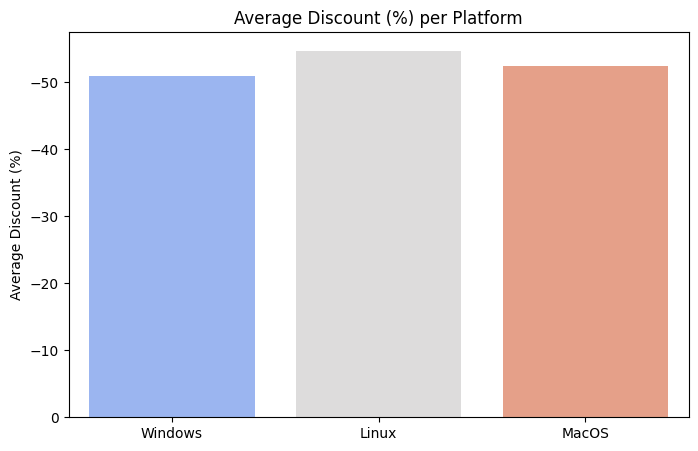

In [9]:
avg_discount = {plat: steam_df[steam_df[plat]==1]['Discount%'].mean() for plat in platforms}
plt.figure(figsize=(8,5))
sns.barplot(x=list(avg_discount.keys()), y=list(avg_discount.values()), palette='coolwarm')
plt.title('Average Discount (%) per Platform')
plt.ylabel('Average Discount (%)')
plt.gca().invert_yaxis()
plt.show()

### Visualizing Game Release Distribution by Year

This code converts release dates to a datetime format, extracts the release year, and counts how many games were released each year.  
The results are displayed as a bar chart, providing a clear visualization of how the number of Steam game releases has changed over time and highlighting periods of growth or decline in publishing activity.

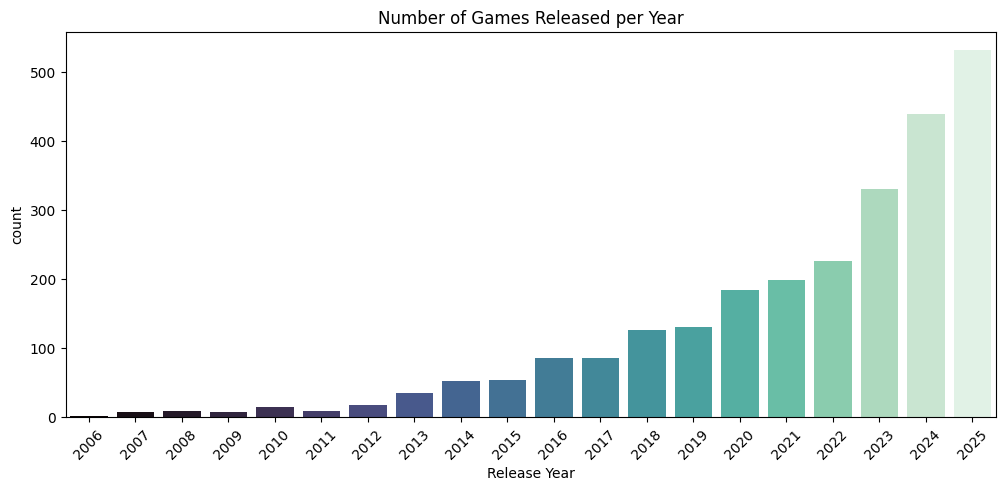

In [10]:
steam_df['Release Year'] = steam_df['Release Date'].dt.year

# For plotting, use only rows with a year and cast to plain int
plot_df = steam_df[steam_df['Release Year'].notna()].copy()
plot_df['ReleaseYearInt'] = plot_df['Release Year'].astype(int)

order = sorted(plot_df['ReleaseYearInt'].unique())

plt.figure(figsize=(12,5))
sns.countplot(
    x='ReleaseYearInt',
    hue='ReleaseYearInt',          # to use the palette w/o deprecation warning
    data=plot_df,
    palette='mako',
    order=order,
    legend=False
)
plt.title('Number of Games Released per Year')
plt.xlabel('Release Year')
plt.xticks(rotation=45)
plt.show()


### Analysis of Game Release Distribution (2006–2025)

The distribution of releases is uneven, reflecting the growth of Steam as a publishing platform rather than the entire gaming industry. 

Between **2006 and 2014**, the dataset includes very few titles per year, suggesting limited adoption of Steam by major publishers and an incomplete sample of total releases. These early values should be treated cautiously, as they are not representative of the market.

From **2015 to 2019**, release counts rise steadily, marking the transition to a broader and more open distribution era. This period aligns with the introduction of Steam Direct (2017), which reduced publishing barriers and led to a gradual increase in indie releases.

After **2020**, there is a sharp acceleration in new titles. The expansion corresponds with the pandemic-driven growth in digital entertainment, easier access to development tools, and continued diversification of the platform. 

Overall, meaningful trend analysis should focus on **2015–2025**, when data density and platform maturity make the sample more reliable for examining price, genre, and rating trends.


### Correlation Heatmap for Numerical

This heatmap shows us the correlation between every numerical field.

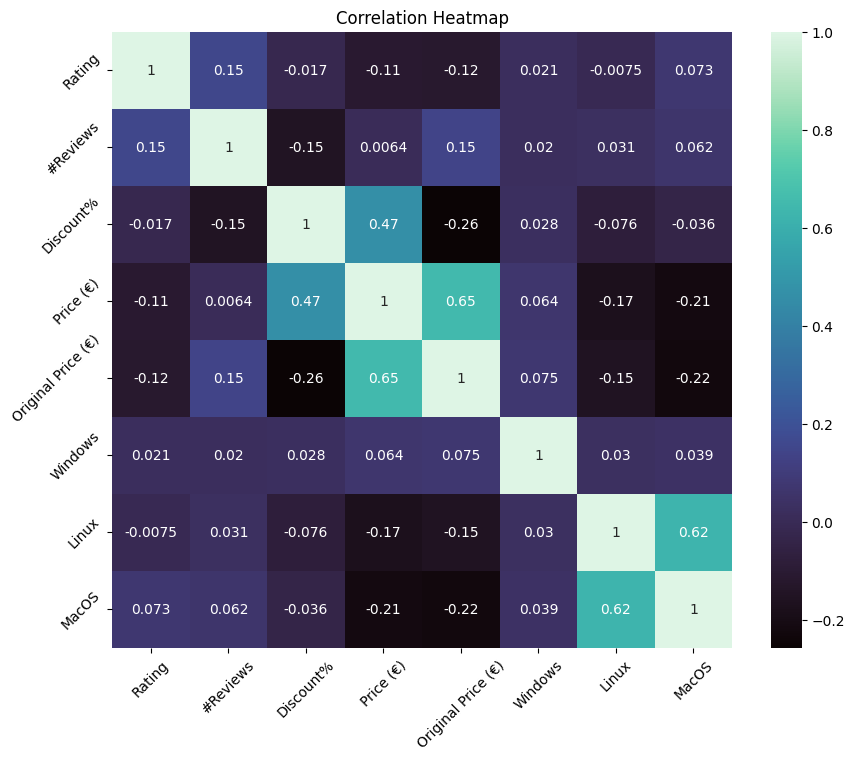

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(
    steam_df[['Rating','#Reviews','Discount%','Price (€)','Original Price (€)','Windows','Linux','MacOS']].corr(),
    annot=True,
    cmap='mako'
)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.yticks(rotation=45)   # Keep y-axis labels horizontal (optional)
plt.show()


### Descriptive Statistics Summary

The dataset contains 2,543 entries with numerical data available for ratings, discounts, prices, and platform availability. On average, games have a rating of around 6.4 out of 8 and an average discount of about 51%, suggesting that most titles are often sold below their original price. The mean price after discounts is €12.74, compared to an average original price of €27.95, indicating a significant reduction in selling prices across the dataset. Most games appear to support Windows, while Linux and macOS availability are much lower.

### Note on Date Column

The release date column was not included in the summary because it is stored as a non-numeric datatype (`object`) and therefore excluded from numerical descriptive analysis.

In [12]:
steam_df.dtypes

Game Name                     object
Rating                         int64
#Reviews                       int64
Discount%                    float64
Price (€)                    float64
Original Price (€)           float64
Release Date          datetime64[ns]
Windows                        int64
Linux                          int64
MacOS                          int64
Fetched At                    object
Release Year                   int32
dtype: object

In [13]:
steam_df.describe()

,Rating,#Reviews,Discount%,Price (€),Original Price (€),Release Date,Windows,Linux,MacOS,Release Year
count,2543.000000,2.543000e+03,2543.000000,2543.000000,2543.000000,2543,2543.000000,2543.000000,2543.000000,2543.000000
mean,6.433346,1.845428e+04,-51.055053,12.742993,27.949866,2021-12-07 10:56:17.742823424,0.996068,0.185608,0.281950,2021.417617
min,3.000000,1.000000e+01,-95.000000,0.530000,2.990000,2006-11-29 00:00:00,0.000000,0.000000,0.000000,2006.000000
25%,5.000000,1.013500e+03,-74.500000,5.990000,15.990000,2020-01-12 12:00:00,1.000000,0.000000,0.000000,2020.000000
50%,7.000000,3.344000e+03,-50.000000,9.990000,24.990000,2023-03-06 00:00:00,1.000000,0.000000,0.000000,2023.000000
75%,7.000000,1.391550e+04,-30.000000,16.990000,39.990000,2024-10-18 12:00:00,1.000000,0.000000,1.000000,2024.000000
max,8.000000,1.038433e+06,-10.000000,64.990000,99.990000,2025-09-28 00:00:00,1.000000,1.000000,1.000000,2025.000000
std,1.279637,5.650066e+04,23.132706,8.990933,15.762686,NaN,0.062597,0.388866,0.450038,3.651007


### Creating Price and Year Categories for Cross-Tabulation

This section categorizes games by both **price range** and **release year interval** to explore how pricing patterns have evolved over time.

1. **Extracting Release Year**  
   The `Release Year` column is created by converting the `Release Date` into its numeric year component. This allows grouping and comparison by year.

2. **Defining Price Ranges**  
   Games are divided into price brackets (`0–30`, `30–40`, `40–50`, `50–60`, `60+`) using `pd.cut()`.  
   This simplifies the continuous price data into discrete categories suitable for comparison.

3. **Defining Year Intervals**  
   The `Release Year` values are grouped into 5-year intervals starting from 2000 (e.g., `2000–2004`, `2005–2009`, …).  
   This reduces year-to-year variability and highlights long-term trends.

4. **Cross-Tabulation**  
   A cross-tab (`pd.crosstab`) is created to count the number of games within each **price range** and **year interval** combination.  
   The resulting table shows how the distribution of game prices has changed across different release periods.


In [14]:
price_bins = [0, 30, 40, 50, 60, float('inf')]
price_labels = ['0-30', '30-40', '40-50', '50-60', '60+']

steam_df['Price Range'] = pd.cut(steam_df['Original Price (€)'], bins=price_bins, labels=price_labels, right=False)

year_bins = [2000, 2005, 2010, 2015, 2020, 2025, 2030]
year_labels = ['2000–2004', '2005–2009', '2010–2014', '2015–2019', '2020–2024', '2025+']

steam_df['Year Interval'] = pd.cut(steam_df['Release Year'], bins=year_bins, labels=year_labels, right=False)

cross_tab = pd.crosstab(steam_df['Price Range'], steam_df['Year Interval'])
cross_tab

Year Interval,2005–2009,2010–2014,2015–2019,2020–2024,2025+
Price Range,,,,,
0-30,24,106,341,884,427
30-40,1,10,73,243,39
40-50,0,6,28,120,27
50-60,0,4,33,98,17
60+,0,0,6,34,22


### Cross-Tabulation of Price Range by Release Year Interval

This table shows the distribution of games across different price categories and release periods.  
Lower-priced games (€0–30) dominate all intervals, especially from **2020–2024**, indicating a strong market presence of discounted or lower-cost titles in recent years.  
Mid-range prices (€30–60) appear less frequently, suggesting that fewer games are released at higher price points on Steam.  
The gradual increase in counts across all categories after 2015 reflects the platform’s growth and a larger overall volume of releases in the last decade.  
Further analysis of the **price distribution over time** is needed to determine whether these trends are driven by changing market strategies, consumer demand, or shifts in the types of games being published.


### Filtering Games Released Before 2015

This step filters the dataset to include only games released before the year 2015.  
By displaying their names, release dates, original prices, and ratings, it provides a clearer view of early Steam titles and allows comparison of pricing and quality trends before the platform’s major expansion period.


In [15]:
games_before_2015 = steam_df[steam_df['Release Date'].dt.year < 2015]
games_before_2015[['Game Name', 'Release Date', 'Original Price (€)', 'Rating']]


,Game Name,Release Date,Original Price (€),Rating
17,Europa Universalis IV,2013-08-13,49.99,7
70,Call of Duty®: Black Ops II,2012-11-12,59.99,7
97,Fallout: New Vegas,2010-10-21,9.99,8
103,Far Cry® 4,2014-11-17,29.99,7
129,IL-2 Sturmovik: Battle of Stalingrad,2014-10-22,48.99,5
...,...,...,...,...
2470,DYNASTY WARRIORS 8: Xtreme Legends Complete Ed...,2014-05-13,49.99,7
2479,Silent Hill Homecoming,2008-11-06,39.99,4
2486,Castlevania: Lords of Shadow 2,2014-02-25,39.99,5
2491,FINAL FANTASY® XIII-2,2014-12-11,19.99,4


This step filters the dataset to include only games released before the year 2015.  
By displaying their names, release dates, original prices, and ratings, it provides a clearer view of early Steam titles and allows comparison of pricing and quality trends before the platform’s major expansion period.  
While this list offered useful insight into early releases, a **visualization** was needed to better understand how game releases and pricing evolved over time.


In [31]:
# Load data
df_inflation = pd.read_csv('../data/all_items_hicp.csv')
MAX_YEAR = df_inflation['Year'].max()
# Filter to games released in 2015 or later (earlier years have very little data)
print(f"Total games before filtering: {len(steam_df)}")
df_games = steam_df[(steam_df['Release Year'] >= 2015) & (steam_df['Release Year'] <= MAX_YEAR)].copy()
print(f"Total games after filtering (2015+): {len(df_games)}")

print("\nGames per year:")
print(df_games['Release Year'].value_counts().sort_index())

# Prepare inflation data (assuming you'll use European Union column)
df_inflation = df_inflation.rename(columns={'European Union': 'HICP'})

# Merge with inflation data
df_games = df_games.merge(df_inflation[['Year', 'HICP']], 
                          left_on='Release Year', 
                          right_on='Year', 
                          how='left')

# Handle missing inflation data (games outside the inflation data range)
# Option 1: Use nearest available year
df_games['HICP'] = df_games.groupby('Release Year')['HICP'].transform(
    lambda x: x.fillna(method='ffill').fillna(method='bfill')
)

Total games before filtering: 2543
Total games after filtering (2015+): 1860

Games per year:
Release Year
2015     53
2016     86
2017     85
2018    126
2019    131
2020    184
2021    198
2022    226
2023    331
2024    440
Name: count, dtype: int64


/var/folders/th/ggxxzbv16pvd12pt0k2h8rtr0000gn/T/ipykernel_24688/391301918.py:24: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lambda x: x.fillna(method='ffill').fillna(method='bfill')


In [34]:
# Choose base year for adjustment

BASE_YEAR = 2015

# Get base year HICP
base_hicp = df_inflation[df_inflation['Year'] == BASE_YEAR]['HICP'].values[0]

# Calculate adjustment factor
df_games['adjustment_factor'] = base_hicp / df_games['HICP']

# Apply inflation adjustment to original price
# Remove € symbol and convert to float if needed
df_games['Original Price (€)'] = df_games['Original Price (€)'].astype(float)
df_games['adjusted_price'] = df_games['Original Price (€)'] * df_games['adjustment_factor']

print(f"Base year: {BASE_YEAR}, Base HICP: {base_hicp}")
print(f"Price adjustment example:")
df_games[['Game Name', 'Release Year', 'Original Price (€)', 
                'adjusted_price', 'HICP']].head(10)

Base year: 2015, Base HICP: 100.0
Price adjustment example:


,Game Name,Release Year,Original Price (€),adjusted_price,HICP
0,Cyberpunk 2077,2020,59.99,56.487759,106.20
1,Rust,2018,39.99,38.492636,103.89
2,Microsoft Flight Simulator (2020) 40th Anniver...,2020,69.99,65.903955,106.20
3,Age of Wonders 4,2023,49.99,39.390119,126.91
4,Sea of Thieves: 2025 Edition,2020,39.99,37.655367,106.20
5,Hearts of Iron IV,2024,49.99,38.391829,130.21
6,The Elder Scrolls® Online,2017,19.99,19.605728,101.96
7,Cyberpunk 2077: Phantom Liberty,2023,29.99,23.630920,126.91
8,Fallout 76,2020,39.99,37.655367,106.20
9,Stellaris,2016,39.99,39.890274,100.25


In [33]:
df_inflation

,Year,HICP,Germany,United States
0,2004,81.00,83.8,79.60
1,2005,82.75,85.5,82.54
2,2006,84.58,87.0,85.16
3,2007,86.55,89.0,87.40
4,2008,89.72,91.4,91.22
5,2009,90.60,91.6,90.46
6,2010,92.49,92.7,92.66
7,2011,95.36,95.0,96.20
8,2012,97.88,97.0,98.23
9,2013,99.35,98.6,99.46
